In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold

In [3]:
# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression().fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


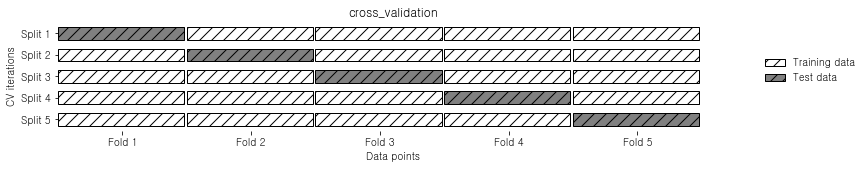

In [4]:
mglearn.plots.plot_cross_validation()


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
print("iris.data.shape:", iris.data.shape)
print("iris.target.shape:", iris.target.shape)

logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수: {}".format(scores))

iris.data.shape: (150, 4)
iris.target.shape: (150,)
교차 검증 점수: [0.961 0.922 0.958]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [1.    0.967 0.933 0.9   1.   ]


In [7]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n{}".format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


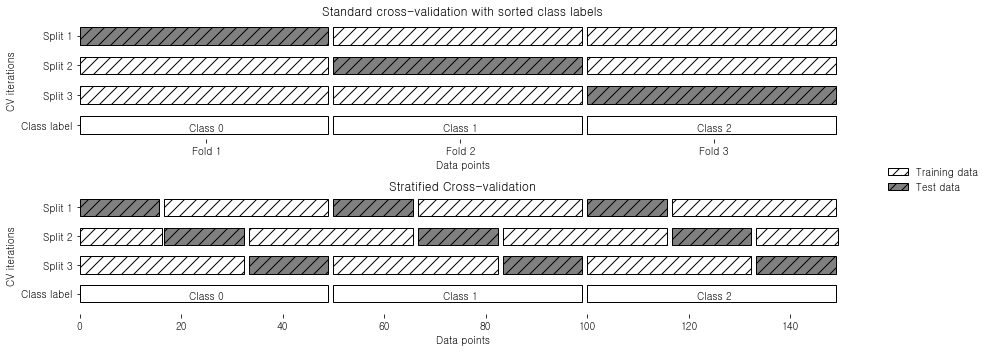

In [9]:
mglearn.plots.plot_stratified_cross_validation()


In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) #교차 검증 분할기의 역할 수행

In [11]:
print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))


교차 검증 점수:
[1.    0.933 0.433 0.967 0.433]


In [12]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[0.9  0.96 0.96]


In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.95


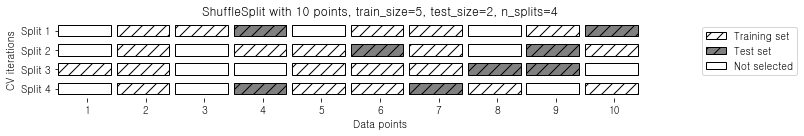

In [15]:
mglearn.plots.plot_shuffle_split()


In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.973 0.92  0.96  0.96  0.96  0.853 0.973 0.933 0.867 0.933]


In [17]:
from sklearn.model_selection import GroupKFold
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n{}".format(scores))

교차 검증 점수:
[0.75  0.8   0.667]


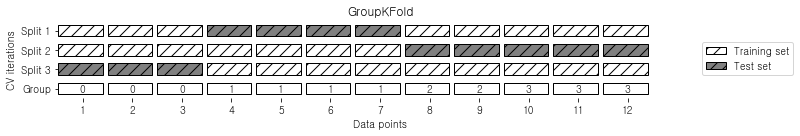

In [18]:
mglearn.plots.plot_group_kfold()
